In [1]:
import scipy.io as sio #Load MATLAB file
import numpy as np
# download the training data form 

# the array dzip contain the numbers with length 1707
dzip = sio.loadmat('dzip.mat')['dzip'][0]
#the array azip contain the 1707 images for the numbers in dzip array
# which 16 * 16 = 256 pixel
azip = sio.loadmat('azip.mat')['azip']

In [2]:
# in the function, we will count how many times the digit apper in dzip
def count_numbers_copies(dzip):
    # digits_copies_counter hold the number of copies
    digits_copies_counter =[]
    # hold the indexes of each digit in dzip
    indexes = []
    for digit in range (10):
        indexes.append ([])
        counter = 0
        for index, i in enumerate (dzip):
            if i == digit:
                counter +=1
                indexes[digit].append(index)
        digits_copies_counter.append(counter)
    return digits_copies_counter,indexes
digits_copies ,indexes =  count_numbers_copies(dzip)
for digit,copies in enumerate(digits_copies):
    print ("the count of copies of digit ",digit , " is ",copies ," copies ." )


the count of copies of digit  0  is  319  copies .
the count of copies of digit  1  is  252  copies .
the count of copies of digit  2  is  202  copies .
the count of copies of digit  3  is  131  copies .
the count of copies of digit  4  is  122  copies .
the count of copies of digit  5  is  88  copies .
the count of copies of digit  6  is  151  copies .
the count of copies of digit  7  is  166  copies .
the count of copies of digit  8  is  144  copies .
the count of copies of digit  9  is  132  copies .


In [3]:
# create numpy zreos matrices for each digit in array of size 10 
def numpy_zreos_matrices(digits_copies):
    array_of_matrices = []
    for copies in digits_copies:
        # create matrix for each digit depend on the number of copies and 256 which is 16 * 16 pixels
        M = np.zeros(shape=(256,copies))
        array_of_matrices.append(M)
    
    return array_of_matrices
digits_matrices = numpy_zreos_matrices(digits_copies)


In [4]:
# now we fill our digits_matrices with inforamtion imges from azip
def preparation_function(dzip,azip,digits_matrices):
    for i in range (10):
        counter =0
        for index , item  in enumerate(dzip):
            if item == i:
                digits_matrices[i][:,counter] = azip[:,index]
                counter += 1
    return digits_matrices
digits_matrices = preparation_function(dzip,azip,digits_matrices)

In [9]:
# find the distance between the image and the matrix of the digit
def find_the_distance(SVD,k,var,azip ):
    U0 , S ,VT = SVD
    smallU0 = U0[:,0:k]
    d =azip[:,var]
    I = np.eye(256)
    v =np.matmul ((I - np.matmul (smallU0 , smallU0.T)) , d)
    distance = np.linalg.norm(v)  
    return distance 

In [10]:
# here we import time for performance measurement
import time
def compute_SVD(M): # here compute SVD one time and save results in SVD_List
    U0 , S ,VT = np.linalg.svd(M)
    SVD = [U0 , S ,VT]
    return SVD
SVD_List=[]
for M in digits_matrices:
    SVD_List.append (compute_SVD(M))
    
# training the model and find best k
def find_All_k(digits_matrices,azip,var,Ks):
    distances=[]
    Periods = []
    Ks = Ks +1 # because we will have less Ks by one since we start k for loop by 1 
    for k in range (1,Ks):
        distances.append([])# this list for number form 0 to 9
        Periods.append([])
        for SVD in SVD_List:
            start = time.time()
            distance  = find_the_distance(SVD,k,var,azip)
            end = time.time()
            period = end - start
            Periods[k-1].append(period)
            distances[k-1].append(distance)
    return distances,Periods

def prediction(distances):
    predict_List=[]
    for row in distances:
        x = min(v for v in row) # here we take the smallest distance 
        index = row.index(x)    # we will take the index of that smallest distance
                                # because it represents the digit
        predict_List.append(index)
        
    return predict_List         # the index of predict_List will represent the k value

Ks=20 # we will use 20 Ks
var = 345# which is index of digit 2  345
    
distances ,Periods= find_All_k(digits_matrices,azip,var,Ks)  
predict_List  = prediction(distances)
Periods_List  = []
# here sum all Periods for a k  
for i in Periods:
    Periods_List.append(sum(i))
    
for i in range (Ks):
    print ("k =",i+1,"  predict=",predict_List[i],"  ",
           predict_List[i] == dzip[var] ,"  Period =",Periods_List[i])
print ("the corect value is = ",dzip[var])



k = 1   predict= 0    False   Period = 0.0017223358154296875
k = 2   predict= 0    False   Period = 0.0016069412231445312
k = 3   predict= 0    False   Period = 0.0016303062438964844
k = 4   predict= 0    False   Period = 0.0016779899597167969
k = 5   predict= 0    False   Period = 0.0015370845794677734
k = 6   predict= 2    True   Period = 0.00150299072265625
k = 7   predict= 2    True   Period = 0.0015330314636230469
k = 8   predict= 2    True   Period = 0.001544952392578125
k = 9   predict= 2    True   Period = 0.0015730857849121094
k = 10   predict= 2    True   Period = 0.0015861988067626953
k = 11   predict= 2    True   Period = 0.0016031265258789062
k = 12   predict= 2    True   Period = 0.0016589164733886719
k = 13   predict= 2    True   Period = 0.0016455650329589844
k = 14   predict= 2    True   Period = 0.001672983169555664
k = 15   predict= 2    True   Period = 0.0016887187957763672
k = 16   predict= 2    True   Period = 0.0017364025115966797
k = 17   predict= 2    True   Pe

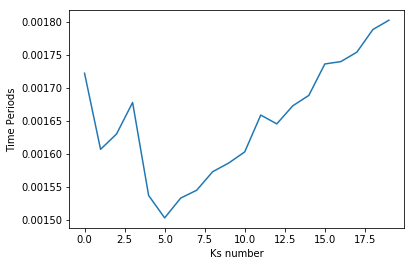

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(Periods_List)
plt.ylabel('Time Periods')
plt.xlabel('Ks number')
plt.show()

In [13]:
Ks=20 # we will use 20 Ks
# take 1:30 hour 
Best_k_list=[0]* Ks # List of zeros to find the best k
for var in range(len (dzip)):# which is 1707 all the data set samples
    print (var)
    distances ,Periods= find_All_k(digits_matrices,azip,var,Ks)
    # I need to add all Periods togther in the same k to give some maening  
    predict_List  = prediction(distances)
    Periods_List  = []
    for i in Periods:
        Periods_List.append(sum(i))
    for i in range (Ks):
        if predict_List[i] == dzip[var]:
            # if true increase the best k for these loop by one
            Best_k_list[i] +=1
            # here in this loop try to find smallest correct k then break
            break
    #if var == 10 :
    #    break
print (Best_k_list)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [14]:

f = open ("Best_k_list.txt","w+")
f.write(str(Best_k_list))
f.close()

In [15]:
f = open ("Best_k_list.txt","r")
Best_k_listr = f.read()
print (Best_k_listr)
f.close()

[1464, 131, 45, 23, 9, 10, 7, 2, 1, 2, 1, 3, 1, 1, 0, 2, 2, 0, 1, 0]


In [16]:
print ("so the best k for this data set is 7 ")

so the best k for this data set is 7 
